In [0]:
# This program predicts stock prices by using machine learning models

#Install the dependencies
import quandl
import numpy as np 
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
import datetime as dt
today_date=dt.date.today()
import pandas as pd

In [33]:
quandl.ApiConfig.api_key = "ybN1pnD4xLUPXsWCvXXd"
df = quandl.get("WIKI/FB")
# Take a look at the data
print(df.head())

             Open   High    Low  ...  Adj. Low  Adj. Close  Adj. Volume
Date                             ...                                   
2012-05-18  42.05  45.00  38.00  ...     38.00     38.2318  573576400.0
2012-05-21  36.53  36.66  33.00  ...     33.00     34.0300  168192700.0
2012-05-22  32.61  33.59  30.94  ...     30.94     31.0000  101786600.0
2012-05-23  31.37  32.50  31.36  ...     31.36     32.0000   73600000.0
2012-05-24  32.95  33.21  31.77  ...     31.77     33.0300   50237200.0

[5 rows x 12 columns]


In [34]:
start_date = '2012-05-18'
end_date = '2018-03-27'
all_weekdays = pd.date_range(start=start_date, end=end_date, freq='B')

all_weekdays=all_weekdays.values

print(all_weekdays)

['2012-05-18T00:00:00.000000000' '2012-05-21T00:00:00.000000000'
 '2012-05-22T00:00:00.000000000' ... '2018-03-23T00:00:00.000000000'
 '2018-03-26T00:00:00.000000000' '2018-03-27T00:00:00.000000000']


In [35]:
# Only Get the Adjusted close price 

df = df [['Close']]

#Take a look at the new data

print(df.head())

              Close
Date               
2012-05-18  38.2318
2012-05-21  34.0300
2012-05-22  31.0000
2012-05-23  32.0000
2012-05-24  33.0300


In [36]:
# A variable for predicting 'n' days out into the future
forecast_out = 30 #'n=30' days
#Create another column (the target or dependent variable) shifted 'n' units up
df['Prediction'] = df[['Close']].shift(-forecast_out)
#print the new data set
print(df.tail())

             Close  Prediction
Date                          
2018-03-21  169.39         NaN
2018-03-22  164.89         NaN
2018-03-23  159.39         NaN
2018-03-26  160.06         NaN
2018-03-27  152.19         NaN


In [37]:
#Create independent data set X
#Convert the dataframe to a numpy array

X = np.array(df.drop(['Prediction'],1))

#Remove n row from the end where forecast_out= 30

X = X[:-forecast_out]
print(X)

[[ 38.2318]
 [ 34.03  ]
 [ 31.    ]
 ...
 [171.5499]
 [175.98  ]
 [176.41  ]]


In [38]:
#Create dependent data set Y 
#Convert the dataframe to a numpy array(all values inlcuding NaN)
y = np.array(df['Prediction'])
#Get all of the Y values except the last 'n' row
y = y[:-forecast_out]
print(y)

[ 30.771  31.2    31.47  ... 159.39  160.06  152.19 ]


In [0]:
# Split the data into 80% training and 20% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [40]:
#Create and train the Support vector Machine
SVR_rbf = SVR(kernel='rbf', C=933, gamma=0.005)
SVR_rbf.fit(x_train,y_train)

SVR(C=933, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.005,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [41]:
#Testing Model : Score returns the coefficient of determination R^2 of prediction
#Best possible score is 1.0
SVM_confidence= SVR_rbf.score(x_test,y_test)
print("SVM confidence: ",SVM_confidence)

SVM confidence:  0.9846688003865783


In [42]:
#Creating and training linear regression
classifier= LinearRegression()
#Training the model 
classifier.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [43]:
#Testing the linear regression model and the best score can be 1.0
classifier_confidence = classifier.score(x_test,y_test)
print("Classifier Confidence: ", classifier_confidence)

Classifier Confidence:  0.9817430584025203


In [44]:
#Set x_forecast equal to last 30 rows of adjusted. close column
x_forecast = np.array(df.drop(['Prediction'],1))[-forecast_out:]
print(x_forecast)
svm_actual= x_forecast

[[173.15]
 [179.52]
 [179.96]
 [177.36]
 [176.01]
 [177.91]
 [178.99]
 [183.29]
 [184.93]
 [181.46]
 [178.32]
 [175.94]
 [176.62]
 [180.4 ]
 [179.78]
 [183.71]
 [182.34]
 [185.23]
 [184.76]
 [181.88]
 [184.19]
 [183.86]
 [185.09]
 [172.56]
 [168.15]
 [169.39]
 [164.89]
 [159.39]
 [160.06]
 [152.19]]


In [45]:
#printing the prediction from linear regression for next 30 days 
classifier_prediction=classifier.predict(x_forecast)
print(classifier_prediction)

[176.98900446 183.42532252 183.86990336 181.24283476 179.87877992
 181.79856081 182.88980469 187.23457198 188.89164601 185.38551985
 182.21282932 179.80805115 180.49513063 184.3144842  183.68802938
 187.6589446  186.27468153 189.19476931 188.71987615 185.80989247
 188.14394188 187.81050625 189.05331177 176.39286198 171.93694948
 173.18985911 168.64300962 163.08574914 163.76272451 155.81078996]


In [46]:
#printing the prediction from support vector regressor model for next 30 days 
SVM_prediction=SVR_rbf.predict(x_forecast)
print(SVM_prediction)

[175.41093792 179.68780439 179.90970729 178.40912024 177.48287074
 178.76225321 179.40238749 181.20840322 181.73404403 180.56706831
 179.01408425 177.43309688 177.91024442 180.1180066  179.82058398
 181.34254125 180.89155563 181.83449736 181.67819272 180.72662779
 181.49484926 181.39012653 181.78729084 174.99309832 172.32464627
 172.97391903 171.05167433 169.20944428 169.54791985 160.54820261]


In [47]:
testval=[]
for i in range(0,30):
  print("Predicted Value: ",SVM_prediction[i],'\tActual Value: ',svm_actual[i][0])
  testval.append(svm_actual[i][0])

Predicted Value:  175.41093792111818 	Actual Value:  173.15
Predicted Value:  179.68780438764094 	Actual Value:  179.52
Predicted Value:  179.90970728781164 	Actual Value:  179.96
Predicted Value:  178.4091202446897 	Actual Value:  177.36
Predicted Value:  177.48287074130542 	Actual Value:  176.01
Predicted Value:  178.7622532128413 	Actual Value:  177.91
Predicted Value:  179.40238749412606 	Actual Value:  178.99
Predicted Value:  181.2084032245914 	Actual Value:  183.29
Predicted Value:  181.73404403229773 	Actual Value:  184.93
Predicted Value:  180.56706831256662 	Actual Value:  181.46
Predicted Value:  179.01408425210678 	Actual Value:  178.32
Predicted Value:  177.4330968820978 	Actual Value:  175.94
Predicted Value:  177.91024441525218 	Actual Value:  176.62
Predicted Value:  180.11800660358546 	Actual Value:  180.4
Predicted Value:  179.82058398142942 	Actual Value:  179.78
Predicted Value:  181.3425412503143 	Actual Value:  183.71
Predicted Value:  180.89155562677476 	Actual V

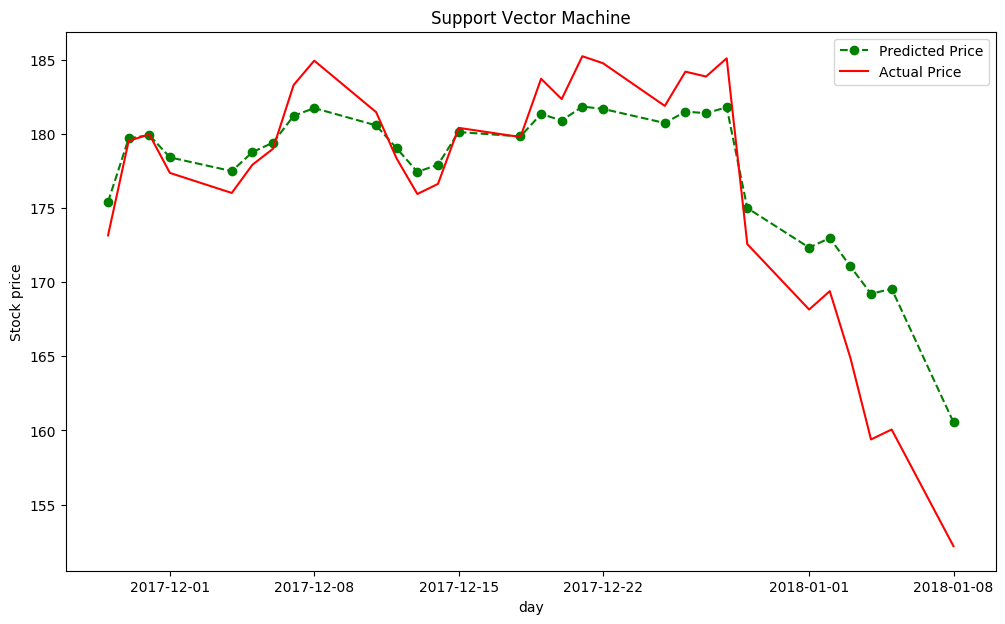

In [48]:
from matplotlib import pyplot as plt
from matplotlib import style

plt.style.use('default')


x = [i for i in range(30)]
y = testval

x2 = [i for i in range(30)]
y2 = SVM_prediction

# can plot specifically, after just showing the defaults:
plt.figure(figsize=(12,7))


plt.plot(all_weekdays[1442:1472],y2, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(all_weekdays[1442:1472],y, color='red', label='Actual Price')
plt.title('Support Vector Machine')
plt.ylabel('Stock price')
plt.xlabel('day')


plt.legend()


In [49]:
testval=[]
for i in range(0,30):
  print("Predicted Value: ",classifier_prediction[i],'\tActual Value: ',svm_actual[i][0])
  testval.append(svm_actual[i][0])

Predicted Value:  176.98900446419208 	Actual Value:  173.15
Predicted Value:  183.42532251832344 	Actual Value:  179.52
Predicted Value:  183.86990335722734 	Actual Value:  179.96
Predicted Value:  181.24283476370434 	Actual Value:  177.36
Predicted Value:  179.87877991706736 	Actual Value:  176.01
Predicted Value:  181.7985608123342 	Actual Value:  177.91
Predicted Value:  182.88980468964377 	Actual Value:  178.99
Predicted Value:  187.2345719789318 	Actual Value:  183.29
Predicted Value:  188.89164601484632 	Actual Value:  184.93
Predicted Value:  185.38551985349062 	Actual Value:  181.46
Predicted Value:  182.21282932131282 	Actual Value:  178.32
Predicted Value:  179.80805114724174 	Actual Value:  175.94
Predicted Value:  180.49513062554777 	Actual Value:  176.62
Predicted Value:  184.31448419613125 	Actual Value:  180.4
Predicted Value:  183.68802937767575 	Actual Value:  179.78
Predicted Value:  187.65894459788552 	Actual Value:  183.71
Predicted Value:  186.2746815312984 	Actual

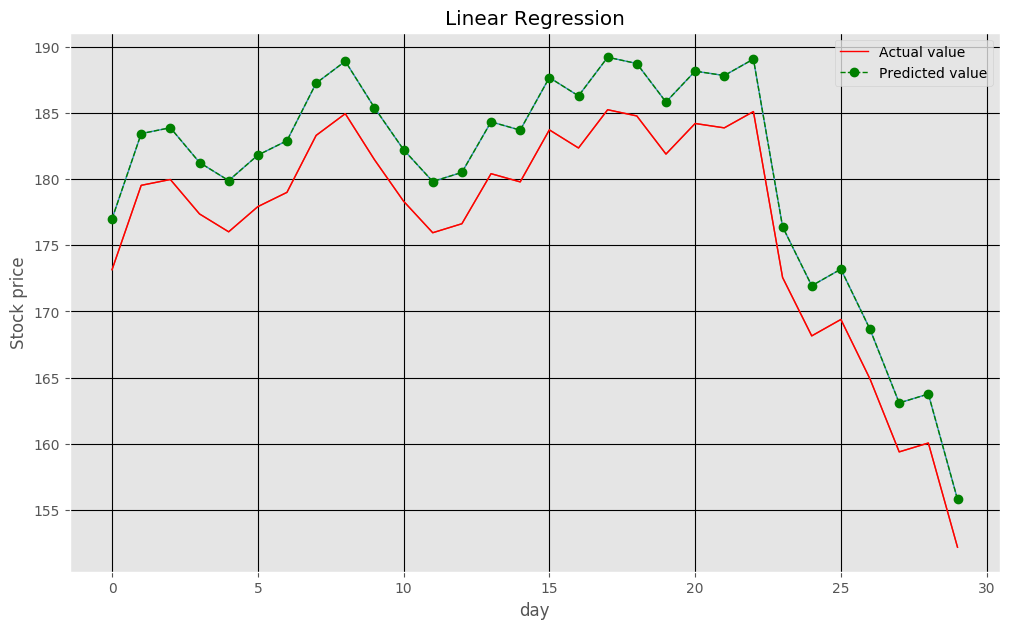

In [50]:
from matplotlib import pyplot as plt
from matplotlib import style

style.use('ggplot')

x = [i for i in range(30)]
y = testval

x2 = [i for i in range(30)]
y2 = classifier_prediction

# can plot specifically, after just showing the defaults:
plt.figure(figsize=(12,7))
plt.plot(x,y,linewidth=1)
plt.plot(x2,y2,linewidth=1)

plt.plot(x,y,'r',label='Actual value', linewidth=1,)
plt.plot(x2,y2,'g',label='Predicted value',linewidth=1, marker='o', linestyle='dashed')

plt.title('Linear Regression')
plt.ylabel('Stock price')
plt.xlabel('day')

plt.legend()

plt.grid(True,color='k')

plt.show()

In [0]:
def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))))


In [52]:
error2 = smape_kun(svm_actual, SVM_prediction)
print('Symmetric mean absolute percentage error: %.3f' % error2)

Symmetric mean absolute percentage error: 4.086


In [55]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(x_test, y_test))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(svm_actual, SVM_prediction))
print('Test Score: %.2f RMSE' % (testScore))
error = mean_squared_error(svm_actual, SVM_prediction)
print('Testing Mean Squared Error: %.3f' % error)

Train Score: 7.48 RMSE
Test Score: 3.71 RMSE
Testing Mean Squared Error: 13.797


In [0]:
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import scorer
from sklearn.metrics import accuracy_score
